# Health Care Cost Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/insurance.csv', sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Explore the dataset**

In [3]:
#clean the dataset
data = data.dropna()
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 0.98, 'The Count of Smokers of Different Genders')

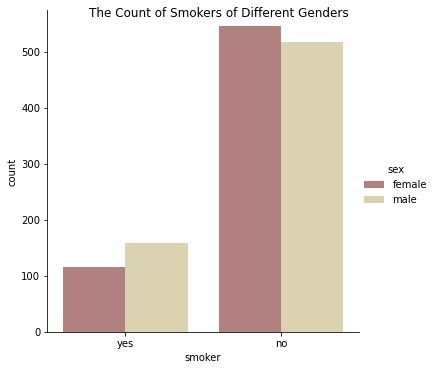

In [5]:
ax1 = sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)
ax1.fig.suptitle('The Count of Smokers of Different Genders')

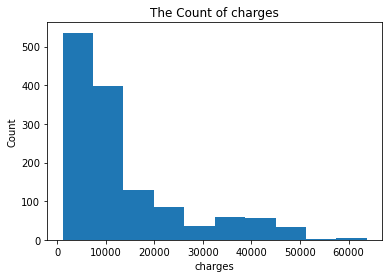

In [6]:
data['charges'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogy()
#plt.semilogx()
plt.xlabel('charges')
plt.ylabel('Count')
plt.title("The Count of charges")
plt.show()

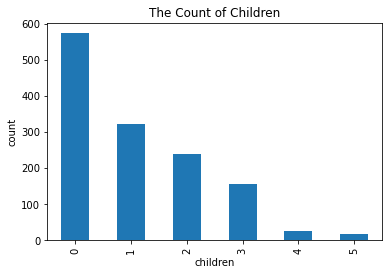

In [7]:
pd.value_counts(data['children']).plot.bar()
plt.ylabel('count')
plt.xlabel('children')
plt.title("The Count of Children")
plt.show()

In [8]:
#Use LabelEncoder to Transform Ordinal Data
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [10]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<ipython-input-11-b6c0d91bb1fd>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

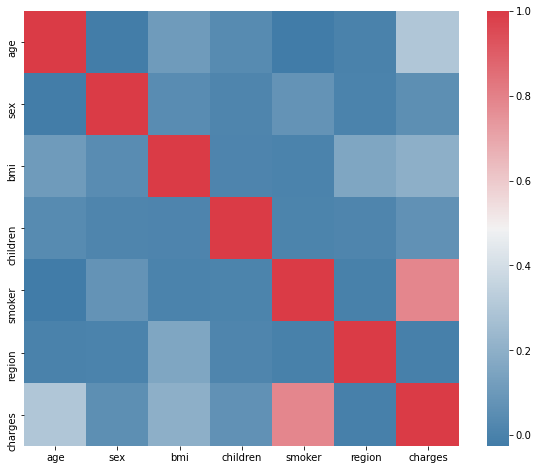

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

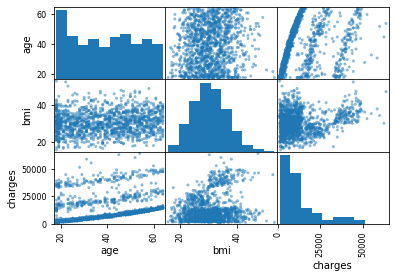

In [12]:
pd.plotting.scatter_matrix(data[['age','bmi','charges']])

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

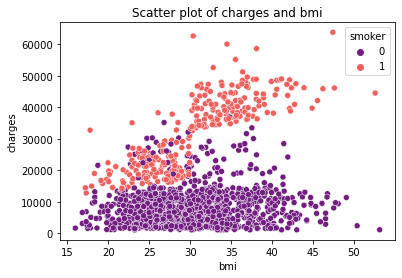

In [13]:
ax2 = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax2.set_title('Scatter plot of charges and bmi')

Text(0.5, 1.0, 'Scatter plot of charges and age')

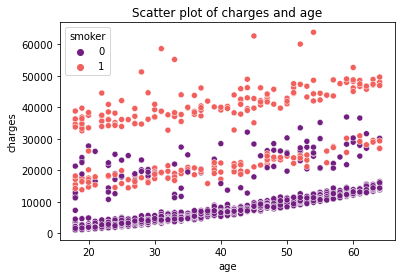

In [14]:
ax3 = sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker')
ax3.set_title('Scatter plot of charges and age')

In [15]:
data_smoker = data[data.smoker==1]
data_smoker

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
11,62,0,26.290,0,1,2,27808.72510
14,27,1,42.130,0,1,2,39611.75770
19,30,1,35.300,0,1,3,36837.46700
23,34,0,31.920,1,1,0,37701.87680
...,...,...,...,...,...,...,...
1313,19,0,34.700,2,1,3,36397.57600
1314,30,0,23.655,3,1,1,18765.87545
1321,62,1,26.695,0,1,0,28101.33305
1323,42,0,40.370,2,1,2,43896.37630


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Build  & Evaluate our Model
X = data.drop(['charges'], axis = 1)
y = data['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['sex','smoker','region'] 
ordinal_cats = [[0,1],[0,1],[0,1, 2,3]]
minmax_ftrs = ['age','bmi','children']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(1070, 6)
(1070, 6)
[[1.         1.         3.         0.41304348 0.48802798 0.8       ]
 [1.         0.         2.         0.         0.49690611 0.        ]
 [0.         1.         0.         0.10869565 0.55716976 0.4       ]
 ...
 [1.         0.         2.         0.47826087 0.24535916 0.        ]
 [1.         0.         1.         0.02173913 0.52649987 0.        ]
 [0.         0.         3.         0.32608696 0.06833468 0.2       ]]
